In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob 
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
club_names_df = pd.read_csv("Data/ClubNames.csv")
data_df = pd.read_csv("Data/FullData.csv")
national_names_df = pd.read_csv("Data/NationalNames.csv")
player_names_df = pd.read_csv("Data/PlayerNames.csv")

In [6]:
data_df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [8]:
data_df.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [9]:
first_few_df = data_df.loc[:1000, ('Name','Nationality','Long_Shots','Freekick_Accuracy','Penalties','Stamina','Crossing','Shot_Power','Finishing')]

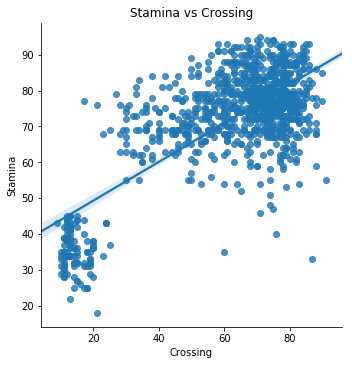

In [11]:
sns.lmplot(x = "Crossing", y = "Stamina", data = first_few_df)
plt.title("Stamina vs Crossing")

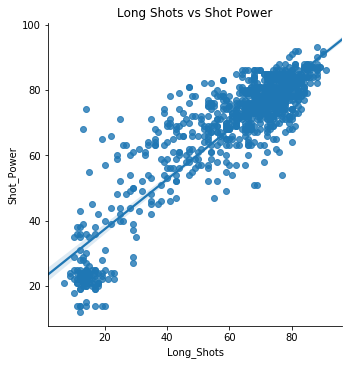

In [12]:
sns.lmplot(x = "Long_Shots", y = "Shot_Power", data = first_few_df)
plt.title("Long Shots vs Shot Power")

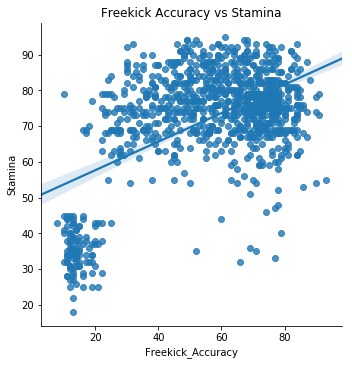

In [13]:
sns.lmplot(x = "Freekick_Accuracy", y = "Stamina", data = first_few_df)
plt.title("Freekick Accuracy vs Stamina")

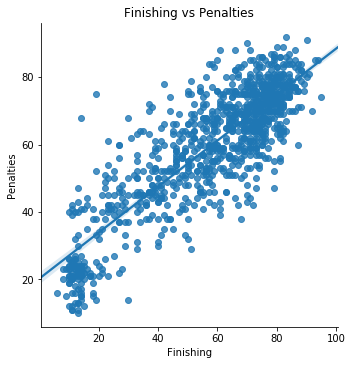

In [14]:
sns.lmplot(x='Finishing', y='Penalties', data=first_few_df)
plt.title('Finishing vs Penalties')

## Regression plot between Crossing vs Stamina

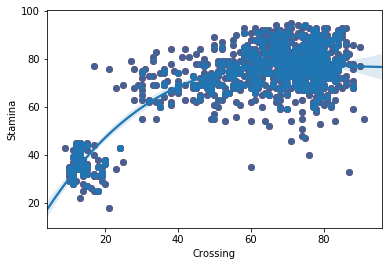

In [23]:
plt.scatter(first_few_df["Crossing"], first_few_df["Stamina"], label = "data", color = "red", marker = "o")
sns.regplot(x = 'Crossing', y = 'Stamina', data = first_few_df, order = 3)

## Residual plot Crossing vs Stamina

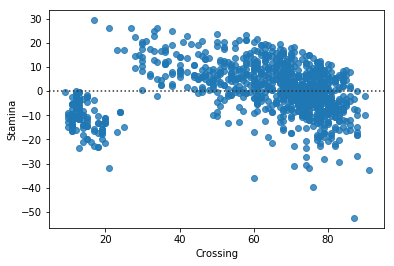

In [24]:
sns.residplot(x = 'Crossing', y = 'Stamina', data = first_few_df)

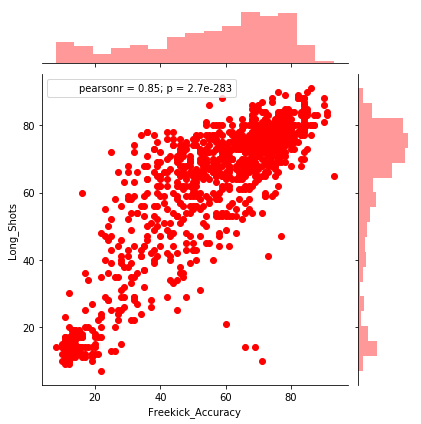

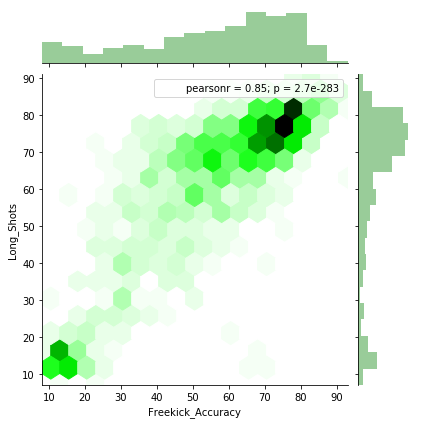

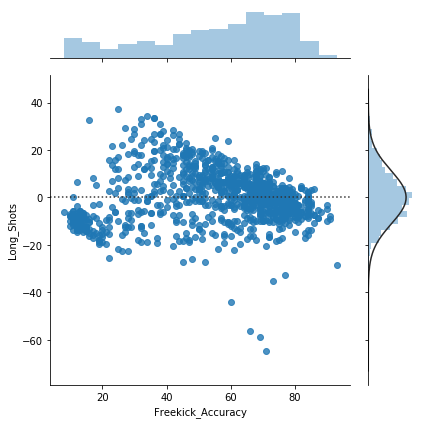

In [25]:
sns.jointplot(x='Freekick_Accuracy',y='Long_Shots',data=first_few_df, kind='scatter', color='r')
sns.jointplot(x='Freekick_Accuracy',y='Long_Shots',data=first_few_df, kind='hex', color='g')
sns.jointplot(x='Freekick_Accuracy',y='Long_Shots',data=first_few_df, kind='resid')

plt.tight_layout()

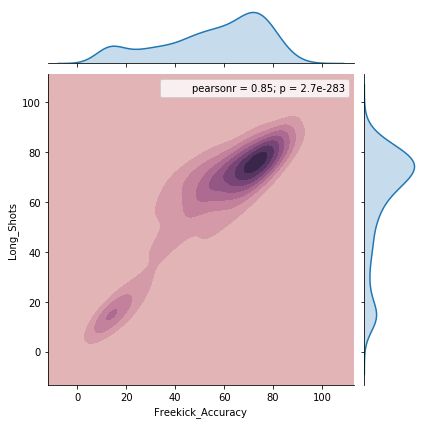

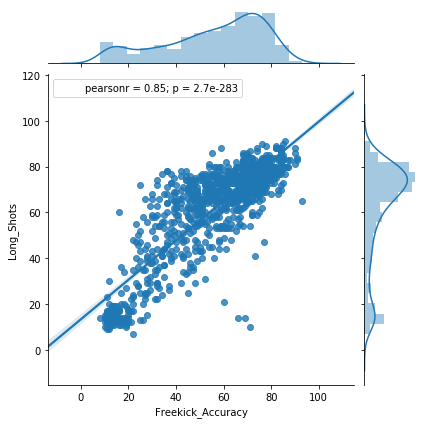

In [29]:
cmap = sns.cubehelix_palette(light=.8, as_cmap=True)
sns.jointplot(x='Freekick_Accuracy',y='Long_Shots',data=first_few_df, kind='kde', cmap = cmap, shade = True)
sns.jointplot(x='Freekick_Accuracy',y='Long_Shots',data=first_few_df, kind='reg')

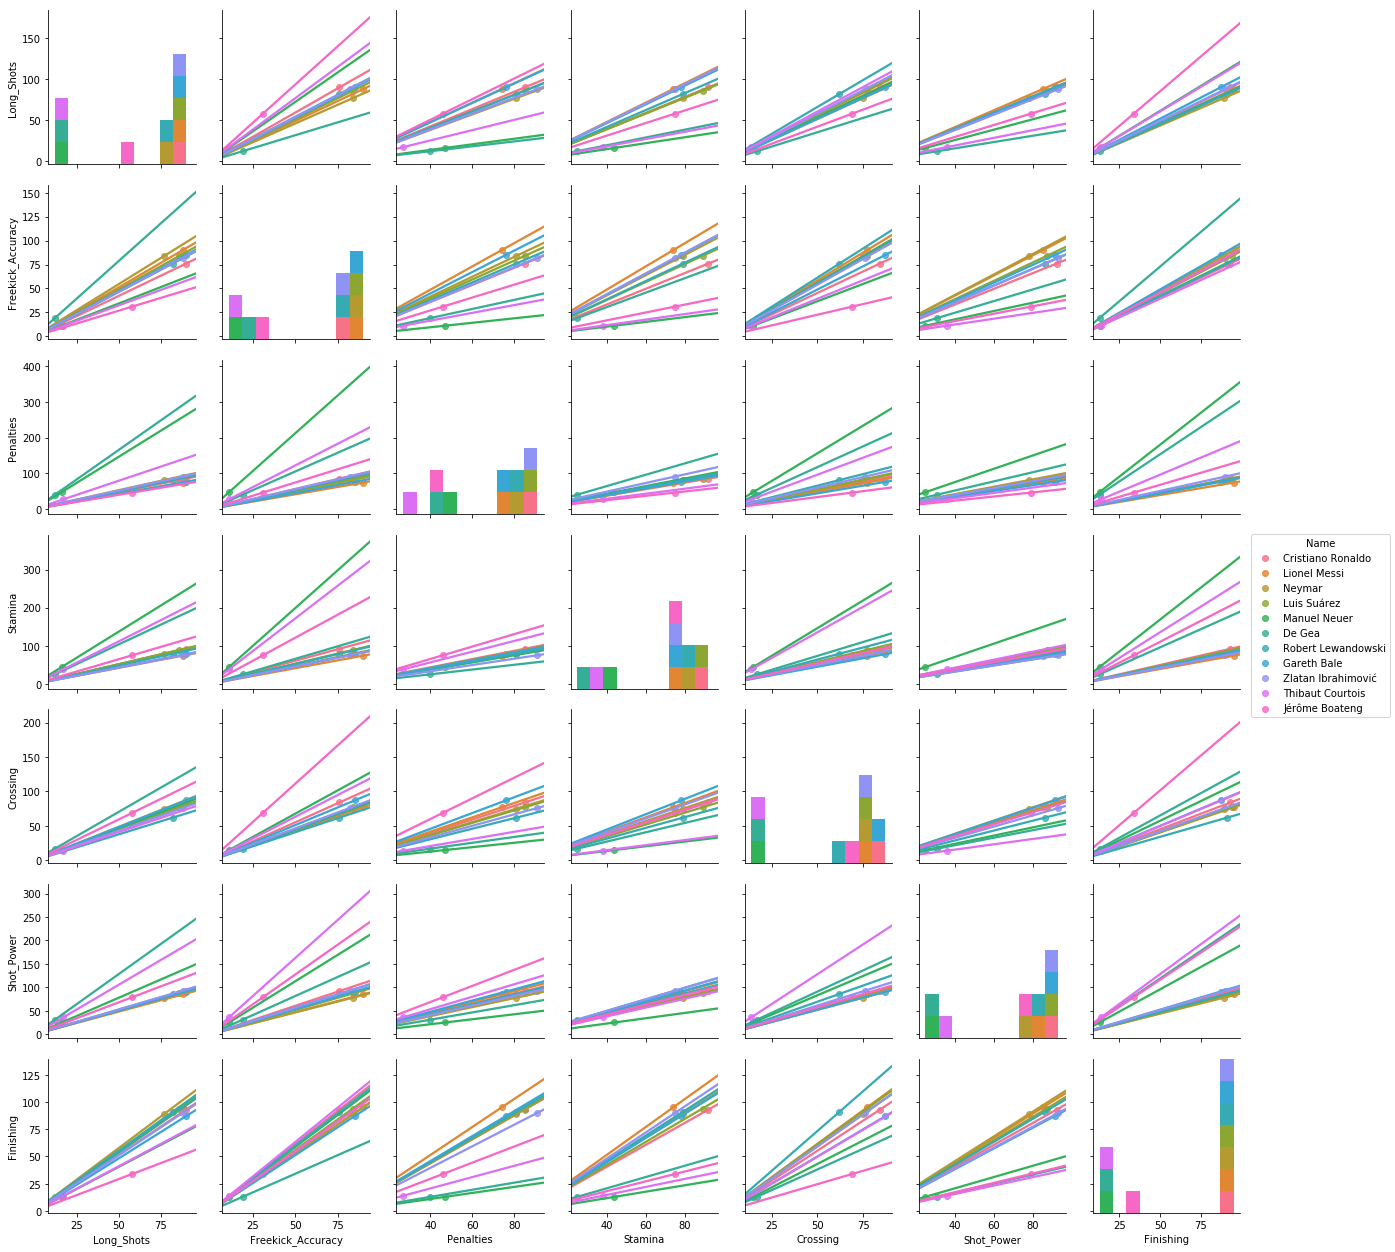

In [32]:
sns.pairplot(first_few_df.loc[:10], hue = "Name", kind = "reg")